In [717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

# Read the Train Data from csv

In [2]:
cred = pd.read_csv('train.csv')

# Explore the data set

In [4]:
cred.head()

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [5]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [6]:
cred.describe()

Id  Annual Income    Tax Liens  Number of Open Accounts  \
count  7500.000000   5.943000e+03  7500.000000              7500.000000   
mean   3749.500000   1.366392e+06     0.030133                11.130933   
std    2165.207842   8.453392e+05     0.271604                 4.908924   
min       0.000000   1.645970e+05     0.000000                 2.000000   
25%    1874.750000   8.443410e+05     0.000000                 8.000000   
50%    3749.500000   1.168386e+06     0.000000                10.000000   
75%    5624.250000   1.640137e+06     0.000000                14.000000   
max    7499.000000   1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

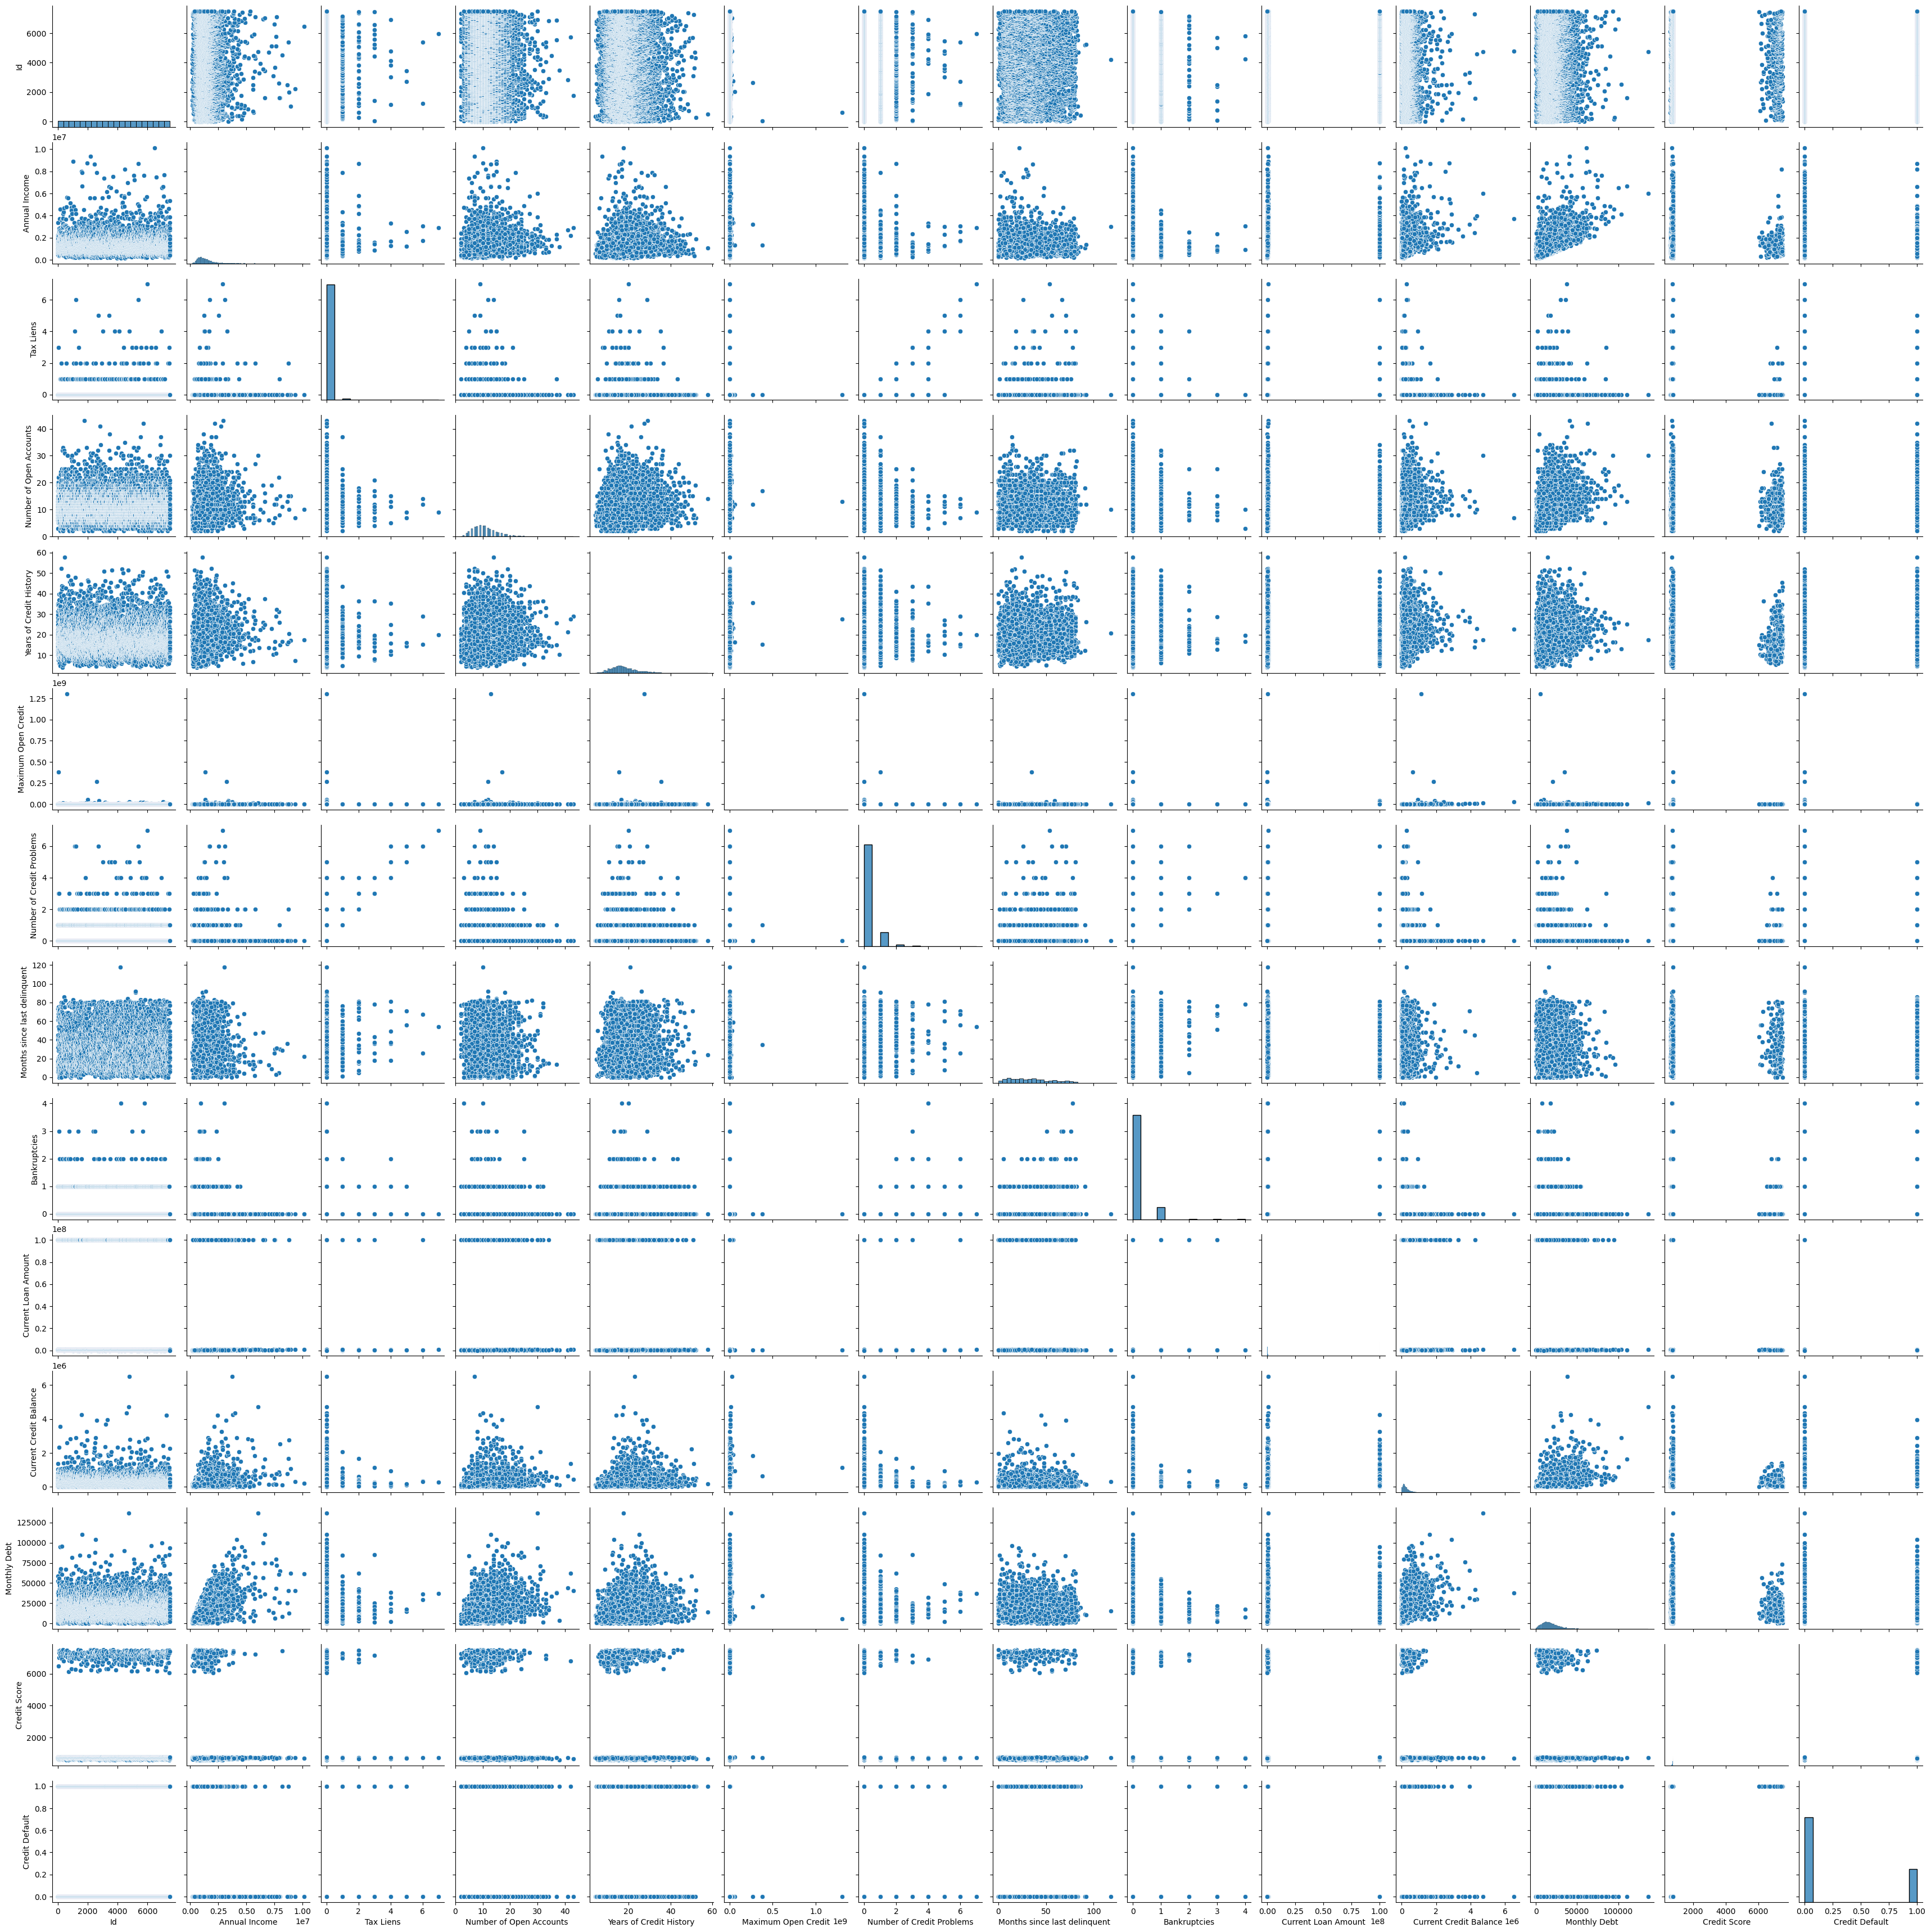

In [16]:
sns.pairplot(cred)

There is nothing too evident from the graph above that seems to be predicting the credit score conclusively!!

However let's make a few relevant pairs of features and see if some patterns are emerging!!

# Emplore features with plots

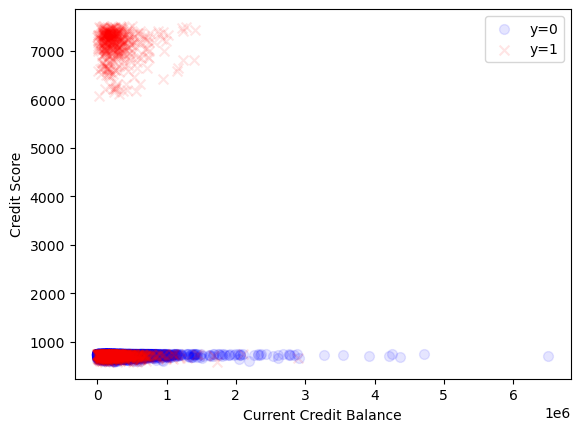

In [35]:
# Current Credit Balance and Credit Score as features

pos = cred['Credit Default'] == 1
neg = cred['Credit Default'] == 0


plt.scatter(cred[neg]['Current Credit Balance'],cred[neg]['Credit Score'], c='b', marker = 'o',s=50 ,alpha =0.1, label = 'y=0')
plt.scatter(cred[pos]['Current Credit Balance'],cred[pos]['Credit Score'], c='r', marker = 'x', s=50,alpha =0.1, label = 'y=1')

plt.xlabel('Current Credit Balance')
plt.ylabel('Credit Score')
plt.legend()


Few insights from the scatter plot above - 
1. Very high credit scorers - they default
2. Very high current credit balance - they don't default
3. It's difficult to predict if they will default or not if both credit balance and credit score are low!!

Let's try to zoom in lower spectrum of the data!!

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Count'>

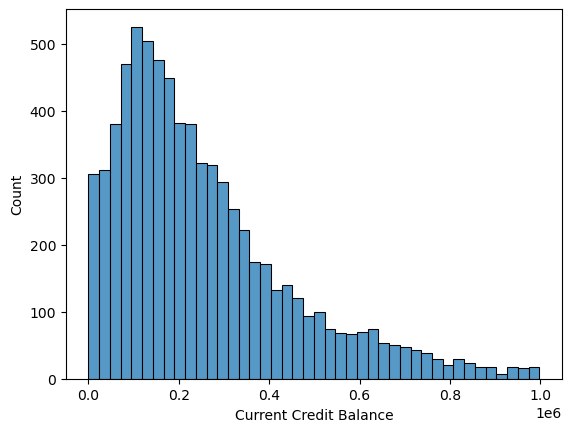

In [40]:
sns.histplot(cred[cred['Current Credit Balance'] < 1e6]['Current Credit Balance'])

<AxesSubplot:xlabel='Credit Score', ylabel='Count'>

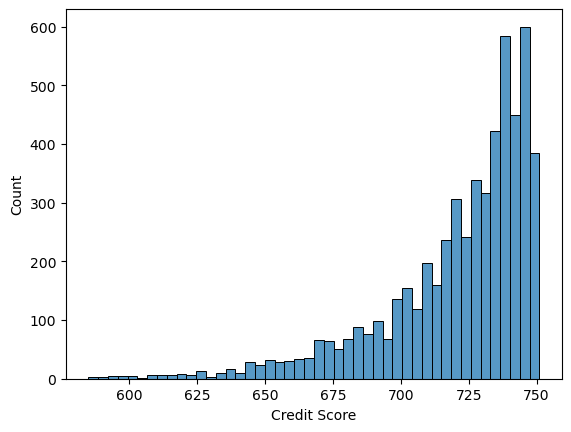

In [47]:
sns.histplot(cred[cred['Credit Score'] < 1000]['Credit Score'])

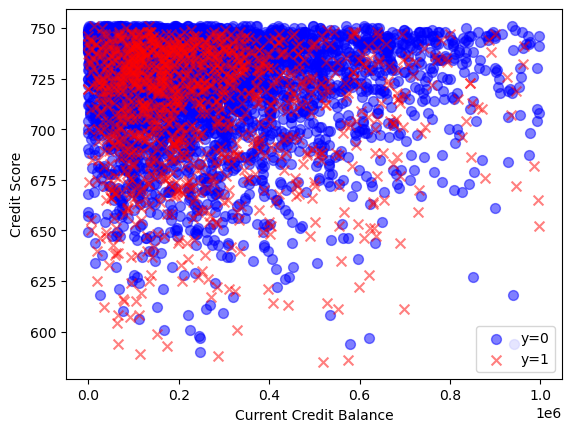

In [63]:
# Zoom in!!
# Below 1 million current credit balance
# Below 1000 Credit score

pos = cred[(cred['Current Credit Balance'] < 1e6) & (cred['Credit Score'] < 1000) & (cred['Credit Default']==1)]
neg = cred[(cred['Current Credit Balance'] < 1e6) & (cred['Credit Score'] < 1000) & (cred['Credit Default']==0)]


plt.scatter(neg['Current Credit Balance'],neg['Credit Score'], c='b', marker = 'o',s=50 ,alpha =0.5, label = 'y=0')
plt.scatter(pos['Current Credit Balance'],pos['Credit Score'], c='r', marker = 'x', s=50,alpha =0.5, label = 'y=1')

plt.xlabel('Current Credit Balance')
plt.ylabel('Credit Score')
plt.legend()


After zooming in on lower end values for both credit balance and credit score, there seems to be no discernible relation with probability to default.

doesn't seem to have a decision boundary

# Let's explore other variables a bit as well!

In [64]:
cred.head()

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

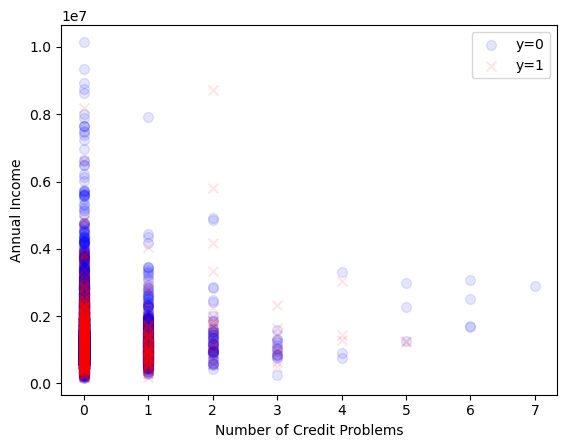

In [71]:
# Annual income and number of credit card problems

pos = cred['Credit Default'] == 1
neg = cred['Credit Default'] == 0


plt.scatter(cred[neg]['Number of Credit Problems'],cred[neg]['Annual Income'], c='b', marker = 'o',s=50 ,alpha =0.1, label = 'y=0')
plt.scatter(cred[pos]['Number of Credit Problems'],cred[pos]['Annual Income'], c='r', marker = 'x', s=50,alpha =0.1, label = 'y=1')

plt.xlabel('Number of Credit Problems')
plt.ylabel('Annual Income')
plt.legend()

Higher income clients seem to be less likely to default, as evident from the graph above!

However, nothing conclusive about the predictive power of credit problems number can be gained from above. This variable is still worth exploring a bit more. Let's dive deeper into this variable

<AxesSubplot:xlabel='Number of Credit Problems', ylabel='count'>

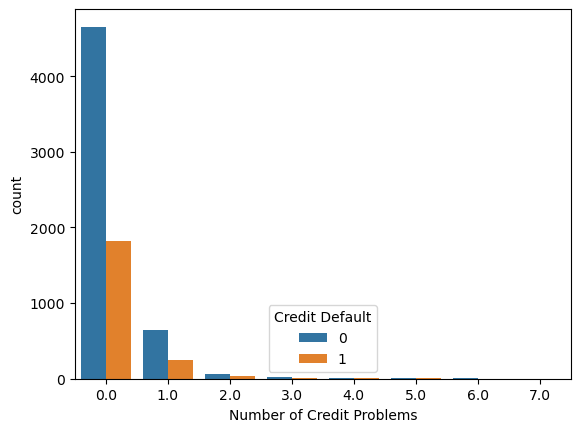

In [81]:
sns.countplot(x = 'Number of Credit Problems', data = cred, hue='Credit Default')

<AxesSubplot:xlabel='Number of Credit Problems', ylabel='count'>

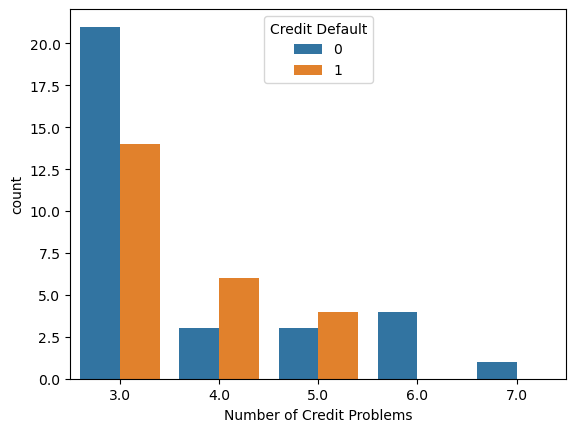

In [80]:
sns.countplot(x = 'Number of Credit Problems', data = cred[cred['Number of Credit Problems'] > 2], hue='Credit Default')

# This graph tried to zoom in on data - more than 2 problems

There is some indication from above two graphs that as the Number of Credit problems are going up, the ratio of defaulters is also going up!

# Extract year from Years in current job column

In [110]:
cred['Years in current job num'] = cred['Years in current job'].str.extract(r'(\d+)').dropna().astype(int)

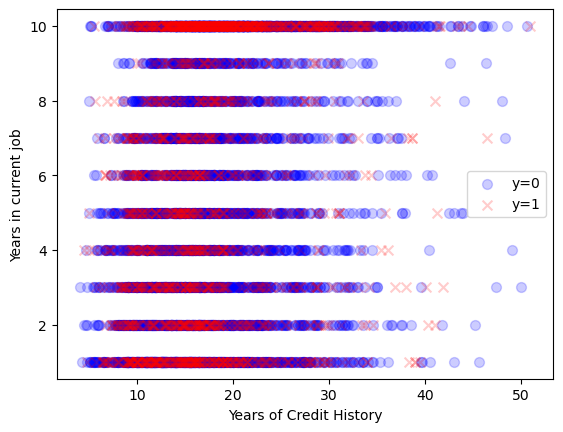

In [117]:
# years of credit history and years in current job!

pos = cred['Credit Default'] == 1
neg = cred['Credit Default'] == 0


plt.scatter(cred[neg]['Years of Credit History'],cred[neg]['Years in current job num'], c='b', marker = 'o',s=50 ,alpha =0.2, label = 'y=0')
plt.scatter(cred[pos]['Years of Credit History'],cred[pos]['Years in current job num'], c='r', marker = 'x', s=50,alpha =0.2, label = 'y=1')

plt.xlabel('Years of Credit History')
plt.ylabel('Years in current job')
plt.legend()

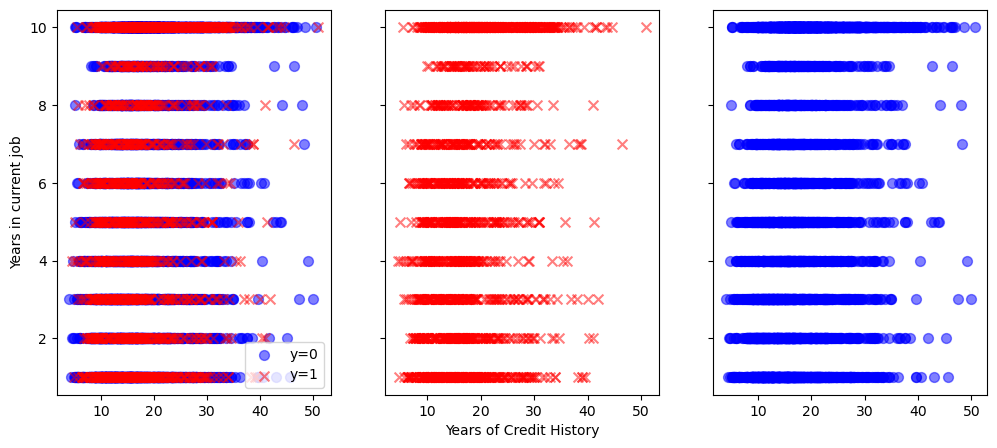

In [129]:
# Since the figures were overlapping, let's have positive and negative target y as seperate subplots

fig, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True)

pos = cred['Credit Default'] == 1
neg = cred['Credit Default'] == 0


ax[0].scatter(cred[neg]['Years of Credit History'],cred[neg]['Years in current job num'], c='b', marker = 'o',s=50 ,alpha =0.5, label = 'y=0')
ax[0].scatter(cred[pos]['Years of Credit History'],cred[pos]['Years in current job num'], c='r', marker = 'x', s=50,alpha =0.5, label = 'y=1')

ax[1].scatter(cred[pos]['Years of Credit History'],cred[pos]['Years in current job num'], c='r', marker = 'x', s=50,alpha =0.5, label = 'y=1')
ax[2].scatter(cred[neg]['Years of Credit History'],cred[neg]['Years in current job num'], c='b', marker = 'o',s=50 ,alpha =0.5, label = 'y=0')

ax[1].set_xlabel('Years of Credit History')
ax[0].set_ylabel('Years in current job')

ax[0].legend()

In [130]:
# Nothing conclusive above!!

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

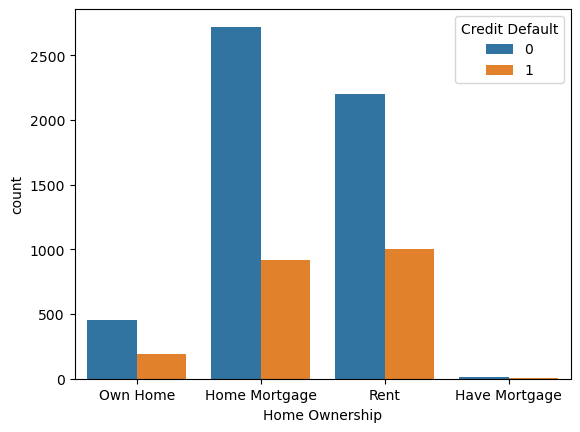

In [84]:
# Home ownership

sns.countplot(x = 'Home Ownership',data=cred, hue = 'Credit Default')

# Let's see correlation of the variables -
- This will give us an idea of which variables to explore together

<AxesSubplot:>

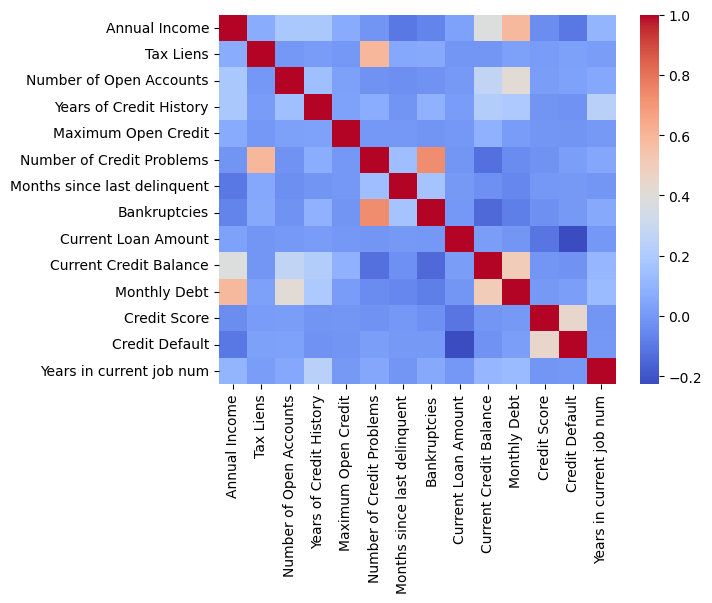

In [142]:
sns.heatmap(cred.drop('Id',axis=1).corr(),cmap='coolwarm')

### Credit default seems to be most strongly related with 
1. Credit score (+ve) 0.44
2. Current Loan Amount (-ve) -0.22
3. Annual Income (-ve) -0.1


In [143]:
cred.drop('Id',axis=1).corr()

Annual Income  Tax Liens  \
Annual Income                      1.000000   0.066245   
Tax Liens                          0.066245   1.000000   
Number of Open Accounts            0.188524  -0.005360   
Years of Credit History            0.186531   0.009109   
Maximum Open Credit                0.062218  -0.002410   
Number of Credit Problems         -0.015407   0.595339   
Months since last delinquent      -0.101787   0.052446   
Bankruptcies                      -0.066877   0.057360   
Current Loan Amount                0.032082  -0.007835   
Current Credit Balance             0.386481  -0.010195   
Monthly Debt                       0.584819   0.027211   
Credit Score                      -0.037832   0.010581   
Credit Default                    -0.101375   0.024368   
Years in current job num           0.103339   0.017313   

                              Number of Open Accounts  \
Annual Income                                0.188524   
Tax Liens                                   -0.005360   
Number of Open Accounts                      1.000000   
Years of Credit History                      0.144819   
Maximum Open Credit                          0.023897   
Number of Credit Problems                   -0.017813   
Months since last delinquent                -0.032740   
Bankruptcies                                -0.019130   
Current Loan Amount                          0.001346   
Current Credit Balance                       0.267325   
Monthly Debt                                 0.413904   
Credit Score                                 0.016095   
Credit Default                               0.028884   
Years in current job num                     0.053665   

                              Years of Credit History  Maximum Open Credit  \
Annual Income                                0.186531             0.062218   
Tax Liens                                    0.009109            -0.002410   
Number of Open Accounts                      0.144819             0.023897   
Years of Credit History                      1.000000             0.029247   
Maximum Open Credit                          0.029247             1.000000   
Number of Credit Problems                    0.071259            -0.004750   
Months since last delinquent                -0.015375            -0.003849   
Bankruptcies                                 0.085699            -0.011650   
Current Loan Amount                          0.010623            -0.002334   
Current Credit Balance                       0.217856             0.088090   
Monthly Debt                                 0.191978             0.010197   
Credit Score                                -0.015683            -0.009136   
Credit Default                              -0.020567            -0.014275   
Years in current job num                     0.235303             0.002894   

                              Number of Credit Problems  \
Annual Income                                 -0.015407   
Tax Liens                                      0.595339   
Number of Open Accounts                       -0.017813   
Years of Credit History                        0.071259   
Maximum Open Credit                           -0.004750   
Number of Credit Problems                      1.000000   
Months since last delinquent                   0.139905   
Bankruptcies                                   0.730751   
Current Loan Amount                           -0.008596   
Current Credit Balance                        -0.124137   
Monthly Debt                                  -0.042252   
Credit Score                                  -0.018473   
Credit Default                                 0.020088   
Years in current job num                       0.049622   

                              Months since last delinquent  Bankruptcies  \
Annual Income                                    -0.101787     -0.066877   
Tax Liens                                         0.052446      0.057360   
Number of Open Acc

# Let's start Cleaning the Data
We need to deal with two things while cleaning data - 
1. Deal with Null values for columns which have nulls - 
        a. Annual Income
        b. Years in current job num
        c. Months since last delinquent
        d. Credit Score

2. Deal with Outliers -
    There are outliers with almost all the columns. Need to figure out how to effectively deal with the outliers.
    
    we can see from the boxplots below that there are outliers with most columns.
    Most notably the outliers are found in - 
        a. Tax liens, 
        b. maximum open credit, 
        c. number of credit problems, 
        d. current loan amount, 
        e. current credit balance, 
        f. credit score,

In [178]:
numeric_feat = cred.select_dtypes(include='number').drop(['Credit Default','Id'],axis=1).columns.tolist()
numeric_feat

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Years in current job num']

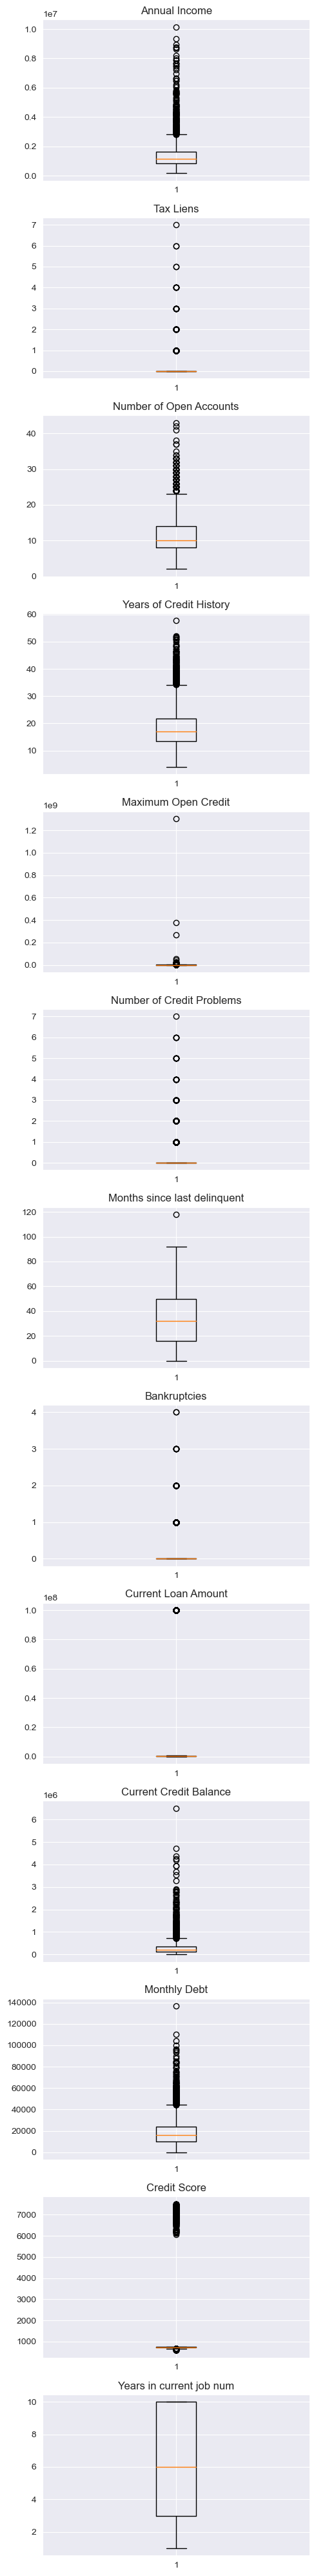

In [193]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(len(numeric_feat),1, figsize=(5,40))

for i in range(len(numeric_feat)):
    ax[i].boxplot(cred[numeric_feat[i]].dropna())
    ax[i].set_title(numeric_feat[i])
    
plt.tight_layout()

# *What to do if I found Outliers in data?*

Two cents From ChatGPT

1. **Evaluate impact on model performance:** Assess the impact of outliers on your model's performance. You can **build and evaluate your logistic regression model with and without outliers** to observe any significant differences in model performance metrics, such as accuracy, precision, recall, and F1 score. This will help you determine if the outliers are significantly affecting your model's performance.


2. **Choose appropriate handling techniques**: Based on the nature of your data and the impact of outliers on your model, you can choose from several techniques to handle outliers:

    a. **Imputation**: If you have a small number of outliers, you can consider imputing or replacing the outlier values with more typical values such as the mean, median, or mode of the feature. This can help you retain the data points and avoid losing valuable information.

    b. **Transformation**: You can also consider applying data transformation techniques such as log transformation, square root transformation, or box-cox transformation to normalize the data and reduce the impact of outliers.

    c. **Winsorizing:** Winsorizing is a technique where you cap the extreme values at a certain percentile (e.g., 95th percentile or 99th percentile) to reduce the impact of outliers without losing the data points altogether.

    d. **Removal:** In some cases, if the outliers are clearly erroneous or do not represent the true nature of the data, you may choose to remove them from your training data. However, this should be done judiciously, as removing too many data points may lead to loss of information and potential bias in your model.

Current loan amount - 99999 is filled a lot of times!! That's causing outliers there


## Let's first Deal with Nulls

In [194]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [196]:
numeric_feat

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Years in current job num']

### *Imputation*

Imputation is the process of filling in missing values with estimated or imputed values. There are several imputation techniques you can consider, such as:

a. Mean/Median/Mode imputation: Replace missing values with the mean, median, or mode of the non-missing values in the same feature. This is a simple and commonly used imputation technique, but it may not be suitable for all scenarios, as it does not account for potential variations or relationships in the data.

b. Forward Fill/Backward Fill imputation: Propagate the last known value forward or the next known value backward to fill in missing values. This approach can be useful for time-series data or data with a natural order.

c. K-nearest neighbors imputation: Estimate missing values based on the values of their K-nearest neighbors in the feature space. This approach takes into account the local neighborhood of data points and can be useful for preserving relationships in the data.

d. Regression imputation: Use regression models to predict missing values based on the values of other features. This approach can capture more complex relationships in the data but may be computationally intensive.

**I will be imputing using median** (not mean). Mean must be skewed because of very extreme values of outliers (and more numbers of them as well)

### Deal with Current Loan Amount first

In [210]:
np.median(cred['Current Loan Amount'])

309573.0

In [211]:
def correct_loan_amount(current_loan):
    if current_loan == 99999999:
        return np.median(cred['Current Loan Amount'])
    else:
        return current_loan

In [212]:
cred['Current Loan'] = cred['Current Loan Amount'].apply(correct_loan_amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x25159265c70>,
 'caps': [<matplotlib.lines.Line2D at 0x2515926a2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x251592658e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2515926aac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2515926ad60>],
 'means': []}

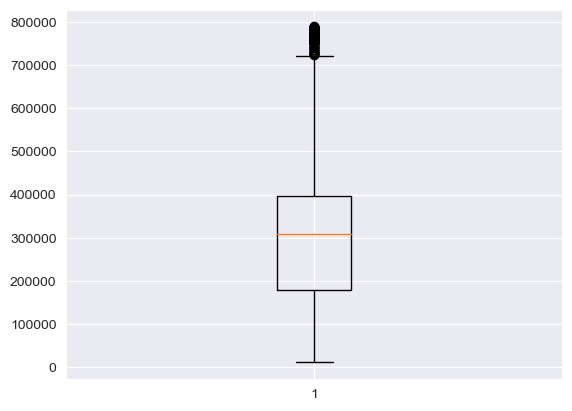

In [214]:
plt.boxplot(cred['Current Loan'])

Awesome!! Current Loan Amount is Dealth with!! 

As a follow up, we need to - 
1. Update numeric_feat list
2. Remove Current loan amount from data frame

In [215]:
numeric_feat

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Years in current job num']

In [216]:
numeric_feat = cred.select_dtypes(include='number').drop(['Credit Default','Id','Current Loan Amount'],axis=1).columns.tolist()
numeric_feat

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Years in current job num',
 'Current Loan']

In [217]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

# *Deal with Annual Income*

there are only 5943 non null values out of 7500. We need to impute it with some sensible numbers. Let's explore it's relation with various categorical and numerical variables to figure out an imputation sense for this!

In [219]:
# caategorical variables first!!
# Home Ownership

cred.groupby('Home Ownership').mean()['Annual Income']

Home Ownership
Have Mortgage    1.093329e+06
Home Mortgage    1.560410e+06
Own Home         1.171777e+06
Rent             1.184194e+06
Name: Annual Income, dtype: float64

<AxesSubplot:xlabel='Home Ownership', ylabel='Annual Income'>

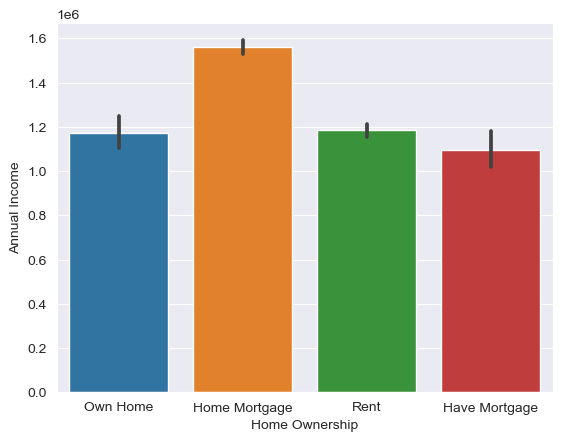

In [223]:
sns.barplot(x='Home Ownership', y = 'Annual Income', data = cred,estimator=np.mean)

In [575]:
# Annual Income seems to most strongly correlated with Monthly debt. 0.5 r!
# I am wondering how can we use montly debt data to estimate monthly income
# Linear regression would be needed to make such a prediction. It will be too complicated!
# Let it be!! Let's just impute mean values of annual income based off Home Ownership

In [237]:
cred.groupby('Home Ownership').mean()['Annual Income']

Home Ownership
Have Mortgage    1.093329e+06
Home Mortgage    1.560410e+06
Own Home         1.171777e+06
Rent             1.184194e+06
Name: Annual Income, dtype: float64

In [236]:
np.mean(cred[cred['Home Ownership']=='Own Home']['Annual Income'])

1171777.0740740742

In [234]:
cred['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [264]:
# Function to fill NaN values in Annual Income column with mean annual income based off the home ownership status!
def fill_na_annual_income(x):
    income = x[1]
    ownership = x[0]
    
    if np.isnan(income):
        if ownership == 'Own Home':
            return np.mean(cred[cred['Home Ownership']=='Own Home']['Annual Income'])
        if ownership == 'Home Mortgage':
            return np.mean(cred[cred['Home Ownership']=='Home Mortgage']['Annual Income'])
        if ownership == 'Rent':
            return np.mean(cred[cred['Home Ownership']=='Rent']['Annual Income'])
        if ownership == 'Have Mortgage':
            return np.mean(cred[cred['Home Ownership']=='Have Mortgage']['Annual Income'])
    else:
        return income


In [265]:
cred['Annual Income filled'] = cred[['Home Ownership', 'Annual Income']].apply(fill_na_annual_income,axis=1)

In [267]:
# Success!! 

In [268]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

## Deal with Years in current job missing values

In [271]:
# Just impute it with median of all values

np.median(cred['Years in current job num'].dropna())

6.0

In [275]:
cred['Years in current job num'].fillna(np.median(cred['Years in current job num'].dropna()), inplace=True)

In [276]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

### Dealing with Bankruptcies null values

In [284]:
cred[cred['Bankruptcies'].isnull()]

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
100    100       Own Home       337079.0               1 year        0.0   
256    256           Rent       857660.0               1 year        0.0   
257    257  Home Mortgage            NaN              2 years        0.0   
898    898           Rent       739005.0              2 years        0.0   
1404  1404           Rent       349391.0             < 1 year        0.0   
3063  3063           Rent       464474.0            10+ years        0.0   
3252  3252           Rent       832770.0             < 1 year        0.0   
3351  3351  Home Mortgage      2226192.0              8 years        0.0   
3401  3401           Rent       326154.0              6 years        0.0   
3496  3496           Rent       233567.0               1 year        0.0   
4334  4334           Rent       772749.0             < 1 year        0.0   
5566  5566       Own Home            NaN             < 1 year        0.0   
7184  7184           Rent       240122.0             < 1 year        0.0   
7379  7379       Own Home       290415.0             < 1 year        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
100                       9.0                     39.6             644204.0   
256                       6.0                     19.7             291082.0   
257                      15.0                     13.6            1556390.0   
898                      20.0                     18.3            2177758.0   
1404                      4.0                     12.7                  0.0   
3063                      5.0                     14.9              38126.0   
3252                      7.0                     16.5             636856.0   
3351                     14.0                     23.3             792836.0   
3401                      2.0                     19.1                  0.0   
3496                      7.0                     11.7                  0.0   
4334                      9.0                     19.6             575124.0   
5566                     12.0                     24.7             594594.0   
7184                      3.0                     12.9              11132.0   
7379                     16.0                     12.5             116644.0   

      Number of Credit Problems  Months since last delinquent  ...  \
100                         0.0                           0.0  ...   
256                         0.0                           0.0  ...   
257                         0.0                           0.0  ...   
898                         0.0                           0.0  ...   
1404                        0.0                           0.0  ...   
3063                        0.0                           0.0  ...   
3252                        0.0                           0.0  ...   
3351                        0.0                          73.0  ...   
3401                        0.0                          77.0  ...   
3496                        0.0                           0.0  ...   
4334                        0.0                          19.0  ...   
5566                        0.0                           0.0  ...   
7184                        0.0                           0.0  ...   
7379                        0.0                           0.0  ...   

                   Purpose        Term Current Loan Amount  \
100   educational expenses  Short Term          99999999.0   
256     debt consolidation  Short Term          99999999.0   
257     debt consolidation  Short Term            447480.0   
898     debt consolidation  Short Term            456808.0   
1404                 other  Short Term             11242.0   
3063                 other  Short Term             44814.0   
3252         business loan  Short Term            156970.0   
3351    debt consolidation  Short Term            528968.0   
3401                 other  Short Term          99999999.0   
3496  educ

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankruptcies', ylabel='count'>

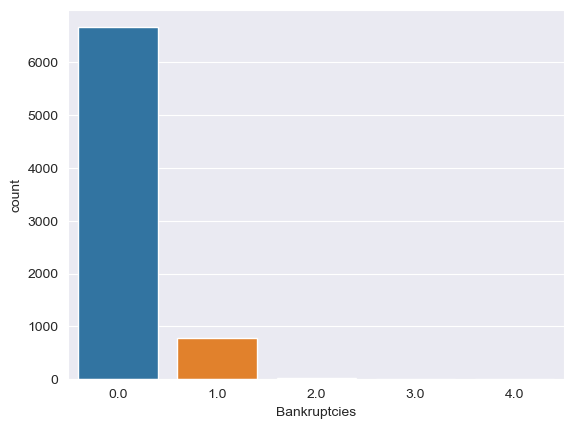

In [285]:
sns.countplot(cred['Bankruptcies'])

In [288]:
# We can see from the graph above that most of the people's status for Bankruptcy was 0 (not bankrupt)
# So let's just fill na with 0

cred['Bankruptcies'].fillna(0, inplace = True)

In [292]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7500 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

### Dealing with Credit Score missing values

<AxesSubplot:xlabel='Credit Default', ylabel='Credit Score'>

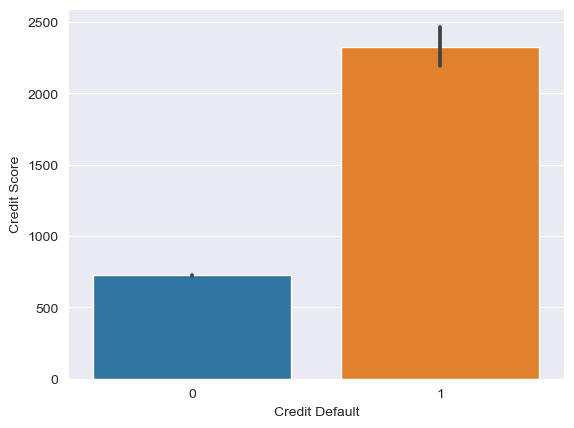

In [293]:
# It seems to have a very close relation with credit default! Let's explore this a bit!

sns.barplot(x='Credit Default', y='Credit Score',data=cred)

Difficult Question!! Shall I impute the mean values of credit score based off the target column itself - Credit Default!!

Let's risk it!!

In [295]:
np.mean(cred[cred['Credit Default']==0]['Credit Score'])

2327.5486111111113

In [296]:
def fill_na_credit_score(x):
    default = x[0]
    score = x[1]
    
    if np.isnan(score):
        if default == 0:
            return np.mean(cred[cred['Credit Default']==0]['Credit Score'])
        if default == 1:
            return np.mean(cred[cred['Credit Default']==1]['Credit Score'])
    else:
        return score
    

In [297]:
cred['Credit Score filled'] = cred[['Credit Default', 'Credit Score']].apply(fill_na_credit_score,axis=1)

In [300]:
# Let's see if this operation made significant difference in correlation between credit score and credit default

cred.corr()

# Seems like the correlation increase a bit, but not a lot.
# From 0.44 to 0.49

Id  Annual Income  Tax Liens  \
Id                            1.000000       0.011426   0.003393   
Annual Income                 0.011426       1.000000   0.066245   
Tax Liens                     0.003393       0.066245   1.000000   
Number of Open Accounts       0.004145       0.188524  -0.005360   
Years of Credit History      -0.009556       0.186531   0.009109   
Maximum Open Credit          -0.022672       0.062218  -0.002410   
Number of Credit Problems     0.008264      -0.015407   0.595339   
Months since last delinquent  0.007262      -0.101787   0.052446   
Bankruptcies                  0.003357      -0.066210   0.057423   
Current Loan Amount          -0.008485       0.032082  -0.007835   
Current Credit Balance       -0.015758       0.386481  -0.010195   
Monthly Debt                  0.005590       0.584819   0.027211   
Credit Score                  0.036498      -0.037832   0.010581   
Credit Default                0.012858      -0.101375   0.024368   
Years in current job num      0.021352       0.101359   0.016510   
Current Loan                  0.002017       0.417871   0.030073   
Annual Income filled          0.010578       1.000000   0.054974   
Credit Score filled           0.027898      -0.037832   0.016947   

                              Number of Open Accounts  \
Id                                           0.004145   
Annual Income                                0.188524   
Tax Liens                                   -0.005360   
Number of Open Accounts                      1.000000   
Years of Credit History                      0.144819   
Maximum Open Credit                          0.023897   
Number of Credit Problems                   -0.017813   
Months since last delinquent                -0.032740   
Bankruptcies                                -0.018859   
Current Loan Amount                          0.001346   
Current Credit Balance                       0.267325   
Monthly Debt                                 0.413904   
Credit Score                                 0.016095   
Credit Default                               0.028884   
Years in current job num                     0.052480   
Current Loan                                 0.201868   
Annual Income filled                         0.172194   
Credit Score filled                          0.017578   

                              Years of Credit History  Maximum Open Credit  \
Id                                          -0.009556            -0.022672   
Annual Income                                0.186531             0.062218   
Tax Liens                                    0.009109            -0.002410   
Number of Open Accounts                      0.144819             0.023897   
Years of Credit History                      1.000000             0.029247   
Maximum Open Credit                          0.029247             1.000000   
Number of Credit Problems                    0.071259            -0.004750   
Months since last delinquent                -0.015375            -0.003849   
Bankruptcies                                 0.085592            -0.011632   
Current Loan Amount                          0.010623            -0.002334   
Current Credit Balance                       0.217856             0.088090   
Monthly Debt                                 0.191978             0.010197   
Credit Score                                -0.015683            -0.009136   
Credit Default                              -0.020567            -0.014275   
Years in current job num                     0.220813             0.002883   
Current Loan                                 0.142627             0.018994   
Annual Income filled                         0.175177             0.024306   
Credit Score filled                         -0.017517            -0.006757   

                              Number of Credit Problems  \
Id                                             0.008264   
Annual Income                                 -0.015407   

In [301]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7500 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

## Awesome! Progress Check!! 
Nulls are dealt with

*(As of now, I am not messing with outliers. Perhaps they will be dealt with during normalisation)*

## What still needs to be done in Data Cleaning -
1. Remove redundant columns from the data frame
2. get dummies for categorical variables 
3. Feature Scaling using z-score normalisation

The above steps will finally make the data ready for starting process of fitting the Logistic Regression Model!

In [304]:
cred.columns

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'Years in current job num',
       'Current Loan', 'Annual Income filled', 'Credit Score filled'],
      dtype='object')

## Get dummies for Categorical Variables

In [321]:
cred[['HO_Home Mortgage', 'HO_Own Home', 'HO_Rent']] = pd.get_dummies(cred['Home Ownership'],drop_first=True,prefix='HO')

In [322]:
cred['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

#### This will create so many dummies / columns!! 
**Thus will be ingoring the purpose column for further analytics**

In [323]:
cred['Term_Short Term'] = pd.get_dummies(cred['Term'], drop_first=True)

In [324]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7500 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [327]:
type(cred['Term_Short Term'][0])

# What is unit8 data type

numpy.uint8

**The uint8 data** type stands for "unsigned integer 8-bit" and is a numeric data type commonly used in computer programming and data analysis. It is an integer data type that can store unsigned (non-negative) integer values ranging from 0 to 255, with a fixed size of 8 bits (or 1 byte) of memory.

In [328]:
#Perfect! Now let's narrow down our columns to relevant ones

## Narrow down to relevant columns
we don't want following columns in our further analsis -
1. Id
2. Home Ownership (we will take dummies)
3. Annual Income (we have made new column)
4. Years in curret job (not integer or float. we have converted this into new column)
5. Months since last delinquent (too few data points to even make imputation reasonable. Anyways not particularly related with target variable)
6. Purpose (too many categories - will complicate the model)
7. Term
8. Credit Score (we have made a new column with filled na)
9. Current Loan Amount (we have another improved column)


And y will be Credit Default

In [368]:
cred_new = cred.drop(['Id', 'Home Ownership', 'Annual Income','Years in current job', 'Months since last delinquent', 'Purpose', 'Term','Credit Score','Current Loan Amount'],axis=1)

X_train = cred.drop(['Id', 'Home Ownership', 'Annual Income','Years in current job', 'Months since last delinquent', 'Purpose', 'Term','Credit Score','Credit Default','Current Loan Amount'],axis=1)

In [370]:
X_train.info()
# Perfect this is the cleaned data for X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tax Liens                  7500 non-null   float64
 1   Number of Open Accounts    7500 non-null   float64
 2   Years of Credit History    7500 non-null   float64
 3   Maximum Open Credit        7500 non-null   float64
 4   Number of Credit Problems  7500 non-null   float64
 5   Bankruptcies               7500 non-null   float64
 6   Current Credit Balance     7500 non-null   float64
 7   Monthly Debt               7500 non-null   float64
 8   Years in current job num   7500 non-null   float64
 9   Current Loan               7500 non-null   float64
 10  Annual Income filled       7500 non-null   float64
 11  Credit Score filled        7500 non-null   float64
 12  HO_Home Mortgage           7500 non-null   uint8  
 13  HO_Own Home                7500 non-null   uint8

In [371]:
X_train.shape

(7500, 16)

In [372]:
y_train = cred['Credit Default']

In [373]:
y_train.shape

(7500,)

In [374]:
# Awesome!! We have X_train and y_train ready for further operations related to Logistic Regression!

# Let's start with feature scaling!!

<AxesSubplot:>

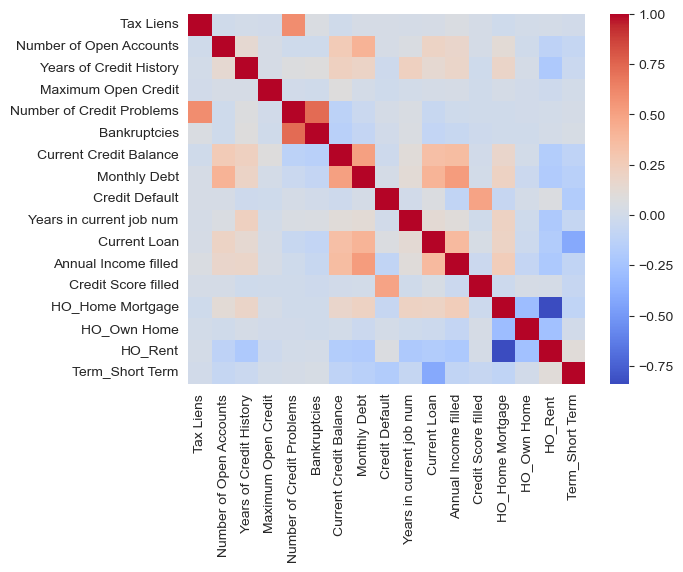

In [375]:
# Just a curiosity about seeing correlation at this point between all relevant variables, now that we have added dummies as well
# Notice just the row of Credit Default!

sns.heatmap(cred_new.corr(), cmap = 'coolwarm')

**The variables to keep an eye out** on will be (for predicting Credit Default)-
1. Current Loan Amount
2. Annual Income filled
3. Credit Score filled
4. HO_Home Mortgage
5. Term_Short Term

# Feature Scaling - 
z score normalisation

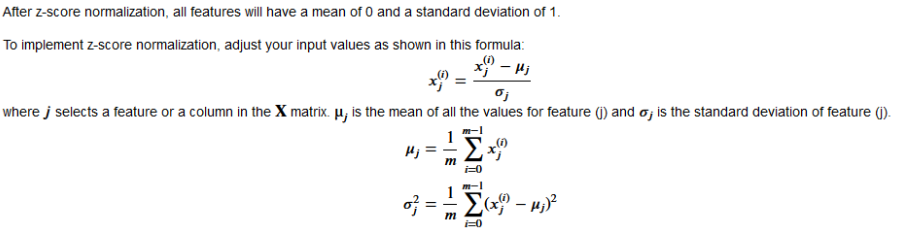

In [376]:
def zscore_normalise(X):
    mu = np.mean(X,axis=0)
    
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu, sigma

In [388]:
# Usually we need to ensure that normalisation is not done on dummy variables, but only done on other continuous variables!
# But we will normalise everything. Because it won't affect our analysis in any way going ahead

In [391]:
X_norm, mu, sigma = zscore_normalise(X_train)

In [398]:
X_norm.head()

# Perfect! We have the data normalised as per z_score! We can now carry on with fitting the logistic regression model

Tax Liens  Number of Open Accounts  Years of Credit History  \
0  -0.110953                -0.026674                 1.133645   
1  -0.110953                 0.788223                -0.428528   
2  -0.110953                -0.026674                 2.369181   
3  -0.110953                -0.637847                 0.593985   
4  -0.110953                 0.380774                -0.669954   

   Maximum Open Credit  Number of Credit Problems  Bankruptcies  \
0            -0.016174                   1.664779      2.545732   
1             0.014763                  -0.340979     -0.337099   
2             0.014807                  -0.340979     -0.337099   
3            -0.049781                   1.664779      2.545732   
4            -0.034902                   1.664779     -0.337099   

   Current Credit Balance  Monthly Debt  Years in current job num  \
0               -0.762772     -0.872085                  0.011333   
1                0.330781      0.004909                  1.183681   
2                0.058379     -0.391034                  0.597507   
3               -0.610282     -0.584980                  0.011333   
4               -0.618292     -0.933631                  0.597507   

   Current Loan  Annual Income filled  Credit Score filled  HO_Home Mortgage  \
0      0.002830             -1.166335            -0.290070         -0.970307   
1     -0.257436             -0.448838            -0.298232         -0.970307   
2      0.002830             -0.810722            -0.294831          1.030601   
3     -1.095166             -0.739876            -0.327479         -0.970307   
4     -1.069235             -0.777908            -0.310475         -0.970307   

   HO_Own Home   HO_Rent  Term_Short Term  
0     3.254530 -0.863603         0.591517  
1     3.254530 -0.863603        -1.690569  
2    -0.307264 -0.863603         0.591517  
3     3.254530 -0.863603         0.591517  
4    -0.307264  1.157940         0.591517

In [400]:
X_norm.shape, y_train.shape

((7500, 16), (7500,))

# Logistic Regression

We need to apply gradient descent to find best values for w and b.

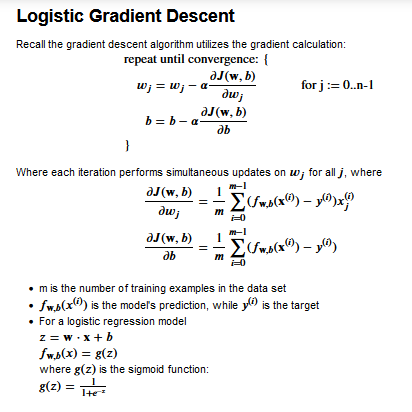

We need to thus device 3 algorithms
1. compute_cost
2. compute_gradient
3. gradient_descent

## 1. Compute Cost 

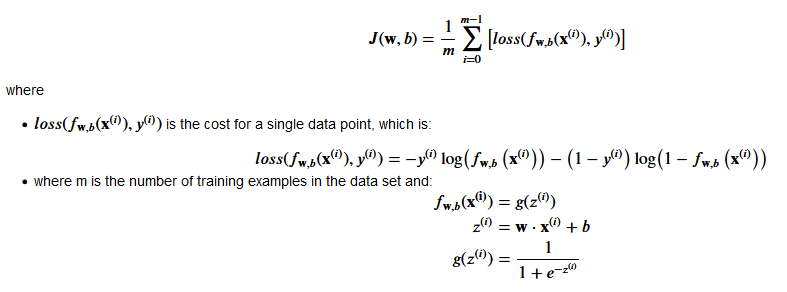

In [414]:
def compute_cost_logistic(X, y, w, b):
    X = X.values
    m,n = X.shape
    
    cost = 0
    for i in range(m):
        f_wb_i = 1/ (1 + np.exp(-(np.dot(X[i],w) + b)))
        loss_i = - y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
        cost += loss_i
    total_cost = cost/m
    return total_cost

I was getting Key Error!! Had to convert df into numpy array using .values for further operation

In [415]:
X_norm_features = X_norm.columns
X_norm_features

Index(['Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies',
       'Current Credit Balance', 'Monthly Debt', 'Years in current job num',
       'Current Loan', 'Annual Income filled', 'Credit Score filled',
       'HO_Home Mortgage', 'HO_Own Home', 'HO_Rent', 'Term_Short Term'],
      dtype='object')

In [419]:
m,n = X_norm.shape
w_tmp = np.zeros(n)
b_tmp = 0

print(f"Cost while keeping w and b as 0 : {compute_cost_logistic(X_norm,y_train,w_tmp,b_tmp)}")

Cost while keeping w and b as 0 : 0.6931471805600337


# 2. Compute Gradient -
find values for dj_dw and dj_db (partial derivatives of the cost) given w and b

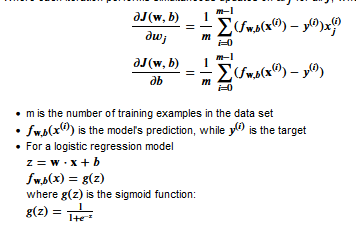

In [420]:
def compute_gradient(X, y, w, b):
    X = X.values
    m,n = X.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        f_wb_i = 1/ (1 + np.exp(-(np.dot(X[i],w) + b)))
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err*X[i,j]
        
        dj_db += err
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [423]:
print(f"""Gradient while keeping w and b as 0 : dj_dw: {compute_gradient(X_norm,y_train,w_tmp,b_tmp)[0]} 
dj_db: {compute_gradient(X_norm,y_train,w_tmp,b_tmp)[1]}""")

Gradient while keeping w and b as 0 : dj_dw: [-0.01096194 -0.0129932   0.00925198  0.00642145 -0.00903661 -0.00073795
  0.00878187 -0.00831307  0.00180922 -0.02887163  0.04113332 -0.22076715
  0.02899027 -0.00461539 -0.02704188  0.08164099] 
dj_db: 0.21826666666666666


# 3. Gradient Descent

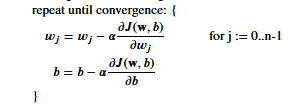

In [429]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, cost_function, gradient_function):
    
    m,n = X.shape
    
    w = w_init
    b = b_init
    
    J_history = []
    
    for i in range(num_iters):
        cost = cost_function(X, y, w, b)
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        J_history.append(cost)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i%100 == 0:
            print(f"Iteration: {i}, cost: {cost}, w: {w}, b:{b})")
    
    return w, b, J_history
    
                  

In [431]:
m,n = X_norm.shape

initial_w = np.zeros(n)
initial_b = 0

alpha = 0.1
iterations = 10000

w_norm, b_norm, J_hist = gradient_descent(X_norm,y_train,initial_w,initial_b,alpha,iterations,compute_cost_logistic,compute_gradient)

Iteration: 0, cost: 0.6931471805600337, w: [ 1.09619362e-03  1.29932003e-03 -9.25198158e-04 -6.42144885e-04
  9.03660885e-04  7.37953489e-05 -8.78187130e-04  8.31306743e-04
 -1.80922006e-04  2.88716300e-03 -4.11333248e-03  2.20767154e-02
 -2.89902671e-03  4.61538806e-04  2.70418774e-03 -8.16409891e-03], b:-0.021826666666666668)
Iteration: 100, cost: 0.45646203996867385, w: [ 0.02159064  0.04744381 -0.01423634 -0.02508615  0.03576482  0.00102255
 -0.04204937  0.06729002  0.00448714  0.07026649 -0.20725648  0.99733237
 -0.07029759 -0.00251276  0.07463925 -0.30605043], b:-0.8356532750437395)
Iteration: 200, cost: 0.4368793153739145, w: [ 0.0163694   0.05447716 -0.008209   -0.03974825  0.0487307  -0.00498709
 -0.05987673  0.1141076   0.00632961  0.06611718 -0.30588842  1.40345448
 -0.07391848 -0.0104333   0.08450905 -0.36936364], b:-0.9085101975043742)
Iteration: 300, cost: 0.42732859350924174, w: [ 0.01090885  0.05406723 -0.0024631  -0.05253939  0.05769756 -0.01224254
 -0.06998025  0.1495

In [433]:
print(f"""w and b after running gradient descent with alpha 0.1 and iterations 10k:
w: {w_norm}
b: {b_norm}""")

w and b after running gradient descent with alpha 0.1 and iterations 10k:
w: [-2.84403192e-02  4.30243782e-02  2.02075425e-02 -6.62496406e-01
  1.16488201e-01 -6.10993476e-02 -8.91595608e-02  2.92873111e-01
  7.70782710e-03  7.52449901e-02 -5.94267640e-01  5.02452625e+00
 -1.22548413e-02  8.67236306e-04  1.41722581e-01 -4.52260109e-01]
b: -0.06470853470903738


## Cost Plot

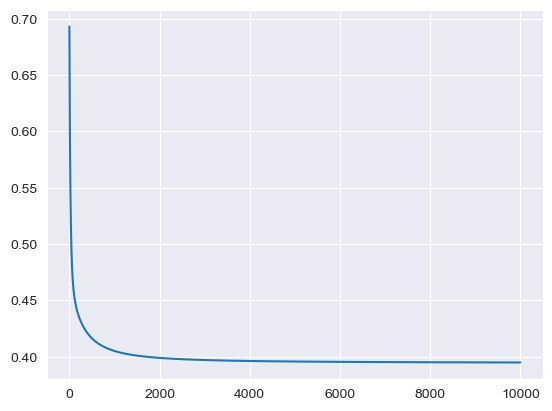

In [436]:
plt.plot(J_hist)

Text(0.5, 1.0, 'after 9900 iterations')

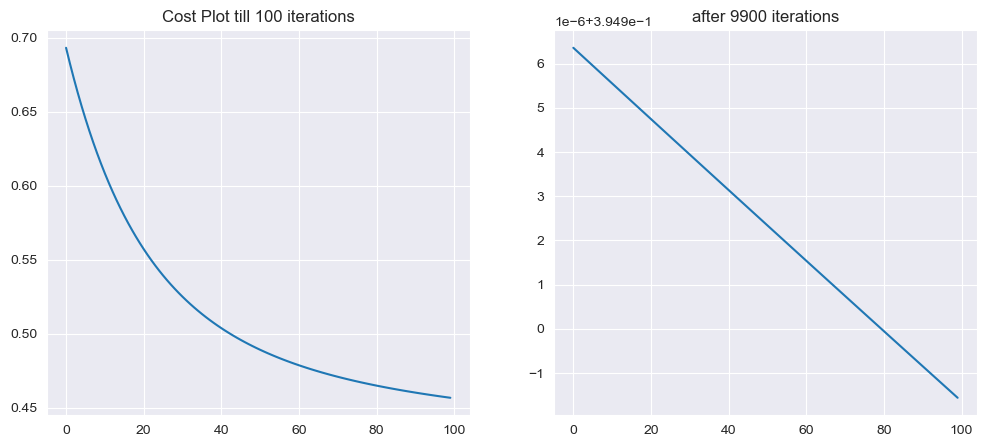

In [440]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(J_hist[0:100])
ax[0].set_title('Cost Plot till 100 iterations')
ax[1].plot(J_hist[9900:])
ax[1].set_title('after 9900 iterations')

The cost continues to reduce in a linear way!! It means that a lot more iterations can be done!!

Or rather we can experiment with higher values for alpha

Anyways!! I am satisfied with the current results. 

Let's get the coefficients (w) in the data frame form so that we can start seeing which features are having bigger influence in the model (the ones which are assigned higher weights - w - by the model)

In [449]:
# Create a df of coefficients w
df_w = pd.DataFrame(data=w_norm, index=X_norm_features,columns=['w'])
df_w

w
Tax Liens                 -0.028440
Number of Open Accounts    0.043024
Years of Credit History    0.020208
Maximum Open Credit       -0.662496
Number of Credit Problems  0.116488
Bankruptcies              -0.061099
Current Credit Balance    -0.089160
Monthly Debt               0.292873
Years in current job num   0.007708
Current Loan               0.075245
Annual Income filled      -0.594268
Credit Score filled        5.024526
HO_Home Mortgage          -0.012255
HO_Own Home                0.000867
HO_Rent                    0.141723
Term_Short Term           -0.452260

In [452]:
# sort values as per the absolutes values of w
df_w.iloc[abs(df_w['w']).argsort()]

w
HO_Own Home                0.000867
Years in current job num   0.007708
HO_Home Mortgage          -0.012255
Years of Credit History    0.020208
Tax Liens                 -0.028440
Number of Open Accounts    0.043024
Bankruptcies              -0.061099
Current Loan               0.075245
Current Credit Balance    -0.089160
Number of Credit Problems  0.116488
HO_Rent                    0.141723
Monthly Debt               0.292873
Term_Short Term           -0.452260
Annual Income filled      -0.594268
Maximum Open Credit       -0.662496
Credit Score filled        5.024526

It can be seen from above that **the biggest contribution to the model is made by following features** (in order of their importance - high to low)-
1. Credit score
2. Maximum Open Credit (unexpected)
3. Annual Income
4. Short Term
5. Monthly Debt (unexpected)

Most of the results are as per my hypothesis! Although, a few features I though would have more influence were -
1. Current Loan Amount
2. Home Mortgage

# Let's predict -
On the same data first - training data!!

In [455]:
pred_probability = 1/ (1 + np.exp(-(np.dot(X_norm,w_norm) + b_norm)))

In [502]:
def predictions(p):
    pred = []
    n = len(p)
    for i in range(n):
        if p[i] < 0.5:
            pred.append(0)
        else:
            pred.append(1)
    return pred

In [503]:
predict = predictions(pred_probability)

In [504]:
len(predict)

7500

In [505]:
y_train.values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [506]:
comparison = np.c_[predict,y_train.values]

In [507]:
comparison

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [508]:
pd.Series(predict).value_counts()

0    6561
1     939
dtype: int64

In [509]:
y_train.value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [510]:
# From the two queries above, it seems that my predictions have been a bit off!!
# Let's check from sklearn as well

In [514]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [518]:
print(classification_report(y_train,predict))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5387
           1       0.99      0.44      0.61      2113

    accuracy                           0.84      7500
   macro avg       0.91      0.72      0.75      7500
weighted avg       0.87      0.84      0.82      7500



In [519]:
accuracy_score(y_train,predict)

0.8410666666666666

In [526]:
print(f"""Confusion Matrix:
TP       FP
{confusion_matrix(y_train,predict)[0]}

FN       TN
{confusion_matrix(y_train,predict)[0]}""")

Confusion Matrix:
TP       FP
[5378    9]

FN       TN
[5378    9]


### Awesome!! This seems to be a decent enough model!! Let's compare the parameters from that of sklearn!

# Sklearn Logistic Regression


In [527]:
from sklearn.linear_model import LogisticRegression

In [587]:
lr_model = LogisticRegression()

In [588]:
lr_model.fit(X_norm,y_train)

LogisticRegression()

In [589]:
lr_model.coef_

array([[-0.02661561,  0.05694712,  0.02413028, -2.66189345,  0.11391033,
        -0.06063915, -0.02025323,  0.2793089 ,  0.00772236,  0.07650226,
        -0.58471451,  5.06156971,  0.08348125,  0.05589975,  0.234846  ,
        -0.45113342]])

In [567]:
df_w_sklearn = pd.DataFrame(data=lr_model.coef_[0],columns=['w from sklearn'],index=X_norm_features)

In [570]:
df_w_combined = pd.concat([df_w,df_w_sklearn],axis=1)

In [571]:
df_w_combined

w  w from sklearn
Tax Liens                 -0.028440       -0.026616
Number of Open Accounts    0.043024        0.056947
Years of Credit History    0.020208        0.024130
Maximum Open Credit       -0.662496       -2.661893
Number of Credit Problems  0.116488        0.113910
Bankruptcies              -0.061099       -0.060639
Current Credit Balance    -0.089160       -0.020253
Monthly Debt               0.292873        0.279309
Years in current job num   0.007708        0.007722
Current Loan               0.075245        0.076502
Annual Income filled      -0.594268       -0.584715
Credit Score filled        5.024526        5.061570
HO_Home Mortgage          -0.012255        0.083481
HO_Own Home                0.000867        0.055900
HO_Rent                    0.141723        0.234846
Term_Short Term           -0.452260       -0.451133

In [582]:
print(f"""Parameter b:
from sklearn {lr_model.intercept_[0]}, 
from gradient descent algorithm {b_norm}""")

Parameter b:
from sklearn -0.08739980053651164, 
from gradient descent algorithm -0.06470853470903738


### Predictions from Sklearn

In [590]:
predict_sklearn = lr_model.predict(X_train)

In [591]:
predict_sklearn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [592]:
print(classification_report(y_train,predict_sklearn))

# for some reason sklearn is predicting all examples as 0! That's why pretty bad scores below

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      5387
           1       0.00      0.00      0.00      2113

    accuracy                           0.72      7500
   macro avg       0.36      0.50      0.42      7500
weighted avg       0.52      0.72      0.60      7500



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [586]:
confusion_matrix(y_train,predict_sklearn)

array([[5387,    0],
       [2113,    0]], dtype=int64)

### Comparison Results!!
From the comparison above, it is evident that the parameters found from gradient descent algorithm is almost identical with the parameters found through sklearn!

A few exceptions -
1. Maximum Open Credit - sklearn gave much higher weight as compared to my gradient descent

Moreover the sklearn model is doing very poorly at predicting defaults, as evident by classification report above. Moreover it is predicting 0 for all training examples, which is surely a poor job!!

# One Last Thing Left - Test The Model on the Test Data!!

In [576]:
cred_test = pd.read_csv('test.csv')

In [577]:
cred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2500 non-null   int64  
 1   Home Ownership                2500 non-null   object 
 2   Annual Income                 1987 non-null   float64
 3   Years in current job          2414 non-null   object 
 4   Tax Liens                     2500 non-null   float64
 5   Number of Open Accounts       2500 non-null   float64
 6   Years of Credit History       2500 non-null   float64
 7   Maximum Open Credit           2500 non-null   float64
 8   Number of Credit Problems     2500 non-null   float64
 9   Months since last delinquent  1142 non-null   float64
 10  Bankruptcies                  2497 non-null   float64
 11  Purpose                       2500 non-null   object 
 12  Term                          2500 non-null   object 
 13  Cur

First we need to Clean the data in a similar way

# Clean the data

1. Impute mean income based off ownership in Annual Income
2. Convert Years in current job to Int (extract number using regex) and then fill null values with median
3. Ignore months since last delinquent
4. fill na Bankruptcies with 0
5. Get dummies for Home Ownership and Term (ignore Purpose)
6. Impute credit score based off credit default

<AxesSubplot:>

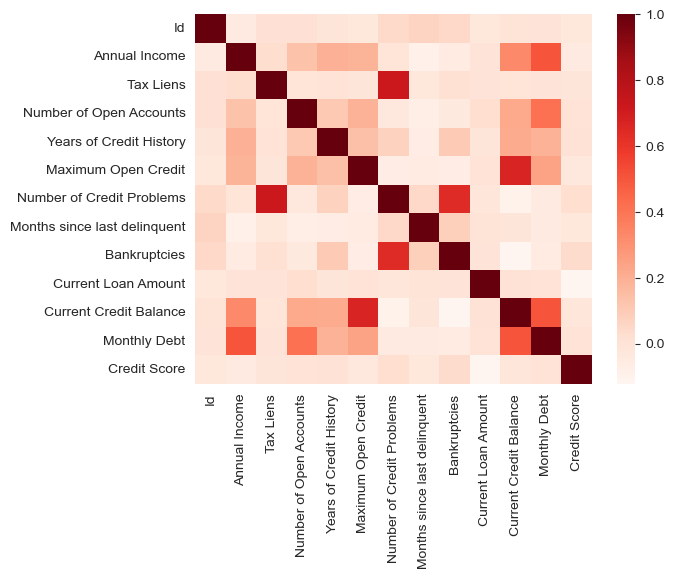

In [597]:
# Let's get some feel for the data first

sns.heatmap(cred_test.corr(),cmap='Reds')

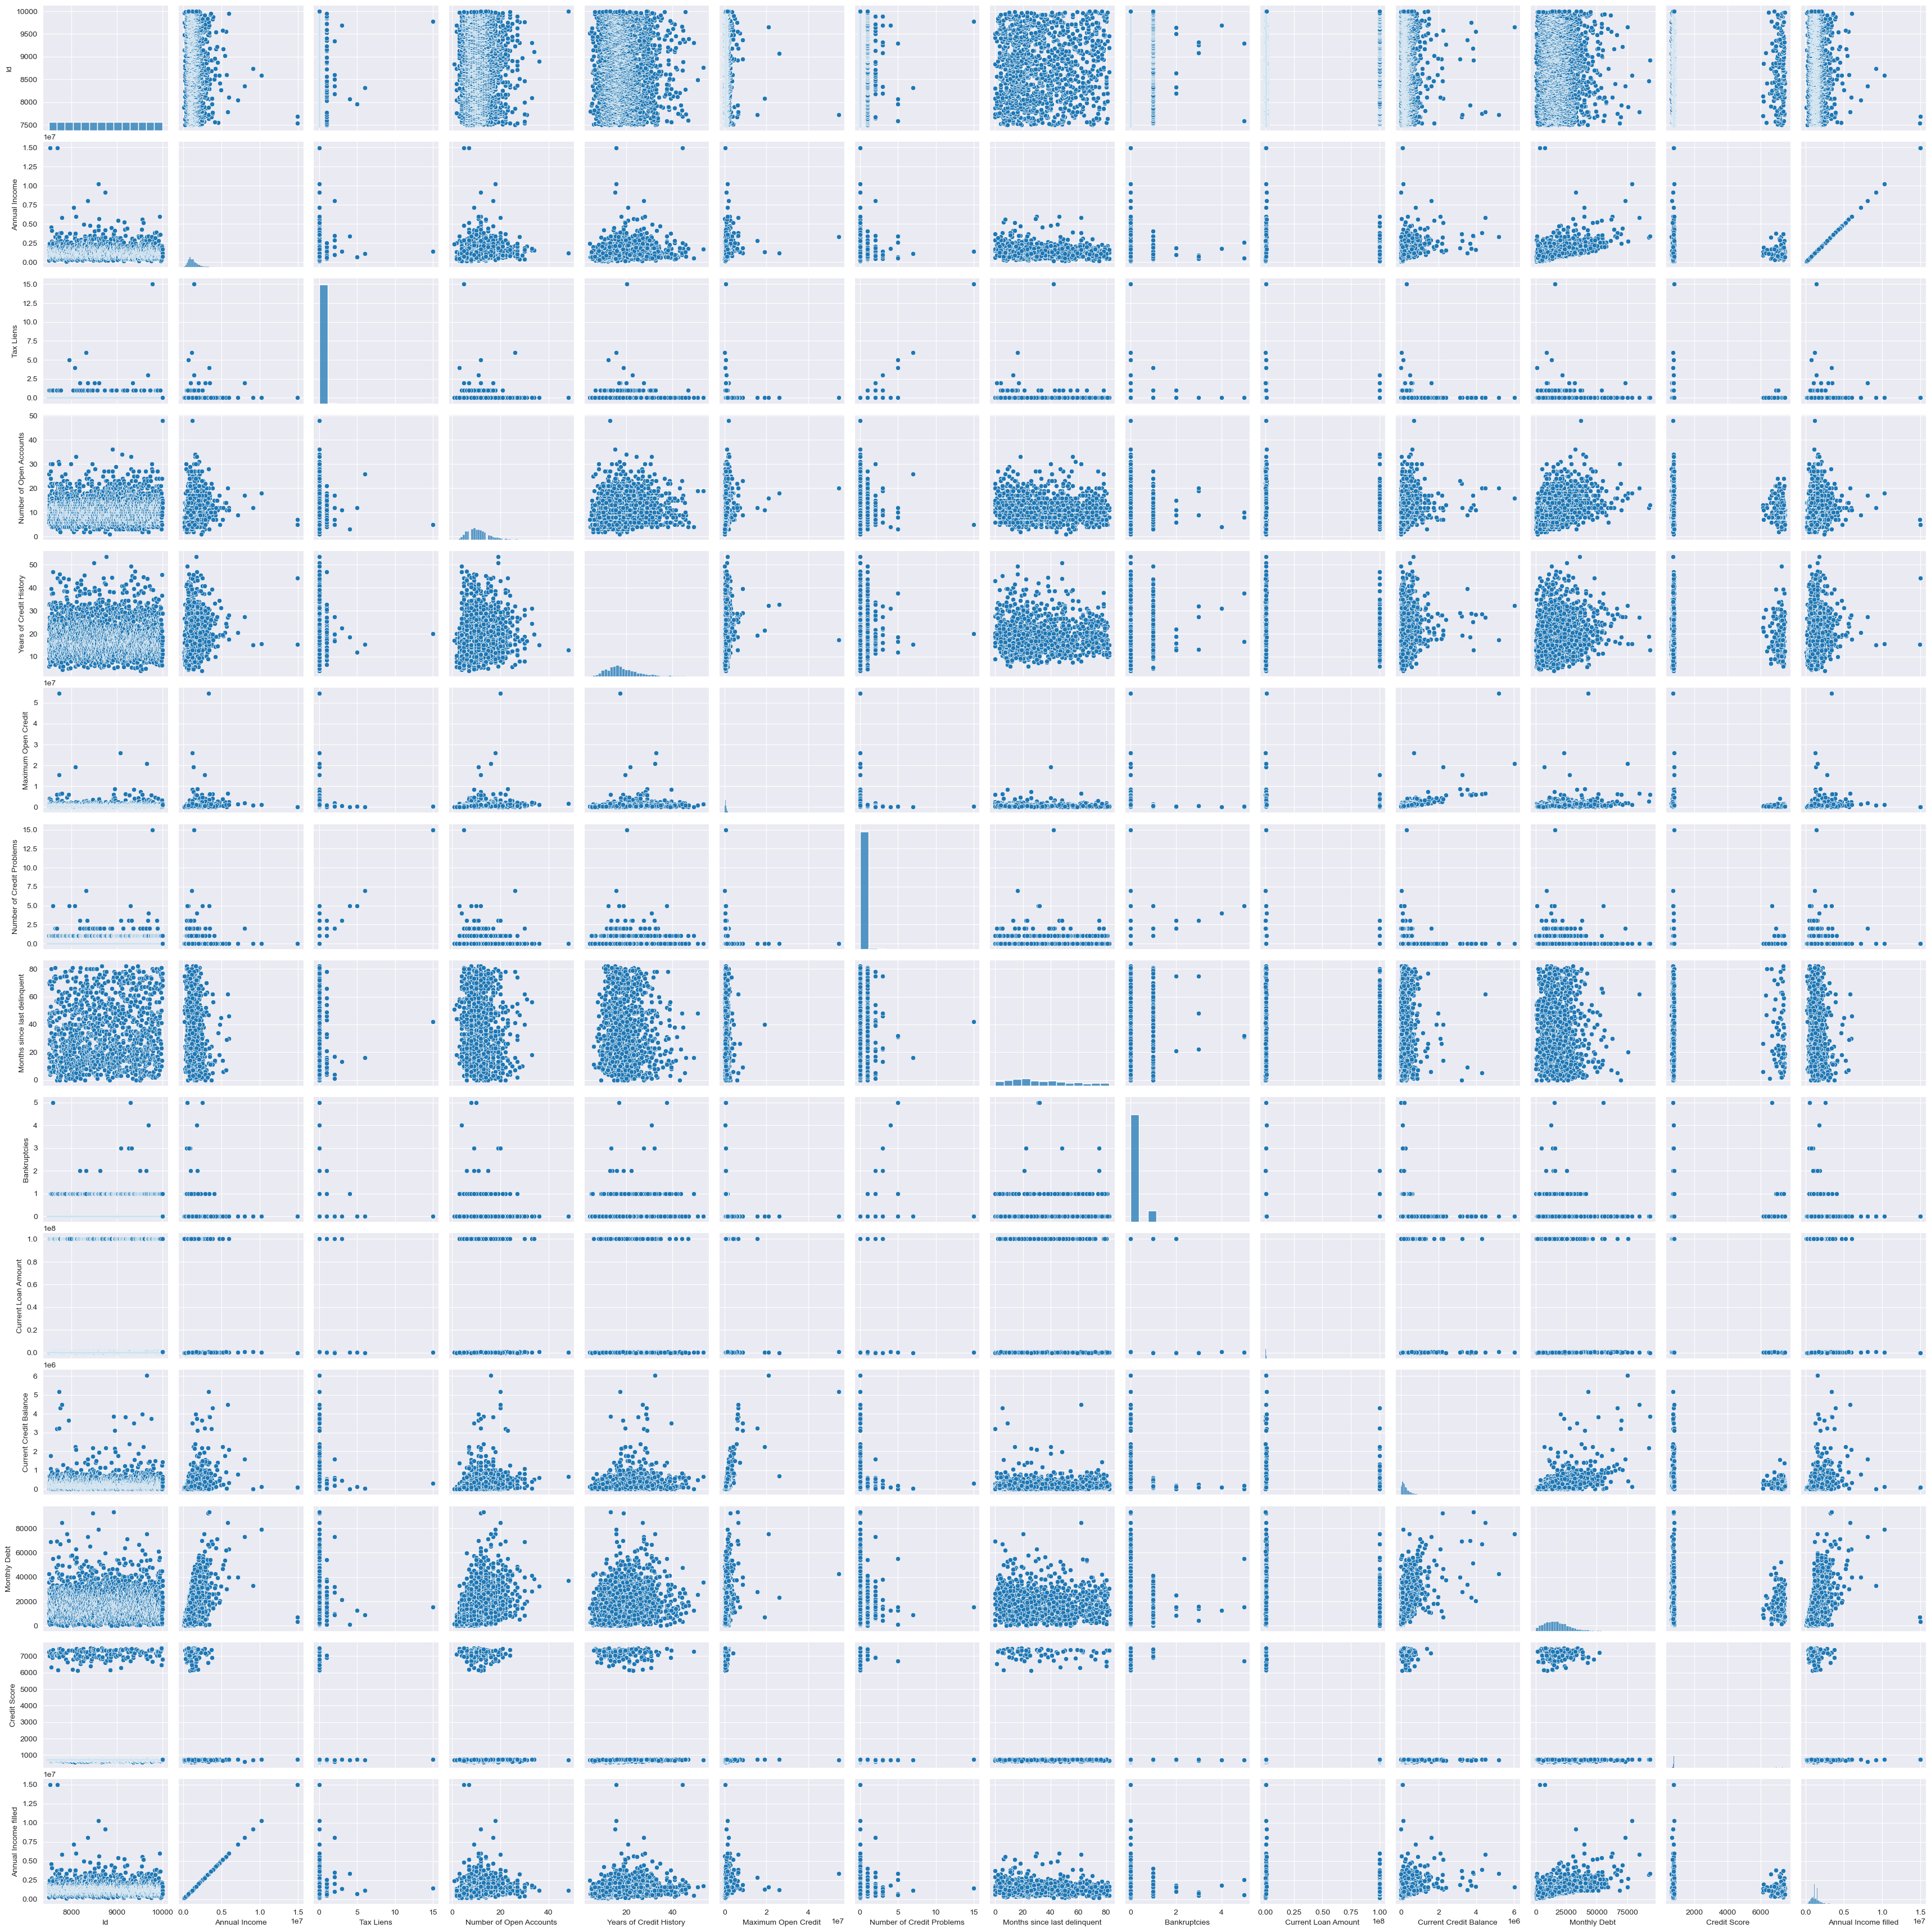

In [611]:
sns.pairplot(cred_test)

In [598]:
# Deal with Annual Income
cred_test.groupby('Home Ownership').mean()['Annual Income']

Home Ownership
Have Mortgage    1.466683e+06
Home Mortgage    1.560959e+06
Own Home         1.142889e+06
Rent             1.186333e+06
Name: Annual Income, dtype: float64

<AxesSubplot:xlabel='Home Ownership', ylabel='Annual Income'>

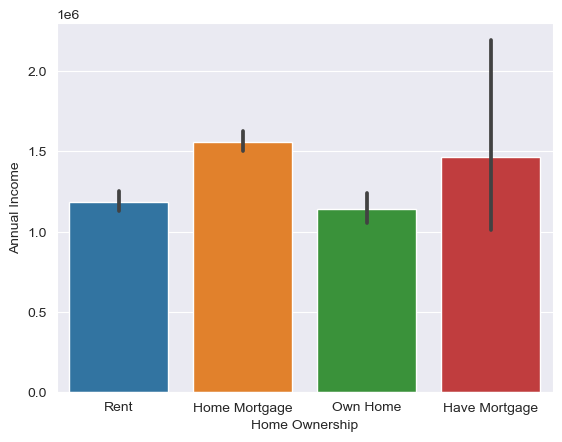

In [607]:
sns.barplot(x='Home Ownership',y='Annual Income',data=cred_test)

In [608]:
def fill_na_annual_income_test(x):
    income = x[1]
    ownership = x[0]
    
    if np.isnan(income):
        if ownership == 'Own Home':
            return np.mean(cred_test[cred_test['Home Ownership']=='Own Home']['Annual Income'])
        if ownership == 'Home Mortgage':
            return np.mean(cred_test[cred_test['Home Ownership']=='Home Mortgage']['Annual Income'])
        if ownership == 'Rent':
            return np.mean(cred_test[cred_test['Home Ownership']=='Rent']['Annual Income'])
        if ownership == 'Have Mortgage':
            return np.mean(cred_test[cred_test['Home Ownership']=='Have Mortgage']['Annual Income'])
    else:
        return income

In [609]:
cred_test['Annual Income filled'] = cred_test[['Home Ownership', 'Annual Income']].apply(fill_na_annual_income_test,axis=1)

In [613]:
# Extract year from years in current job columns
cred_test['Years in current job num'] = cred_test['Years in current job'].str.extract(r'(\d+)').dropna().astype(int)

In [621]:
# Deal with current loan amount column which has 99999999 on some row
def correct_loan_amount_test(current_loan):
    if current_loan == 99999999:
        return np.median(cred_test['Current Loan Amount'])
    else:
        return current_loan

In [622]:
cred_test['Current Loan'] = cred_test['Current Loan Amount'].apply(correct_loan_amount)

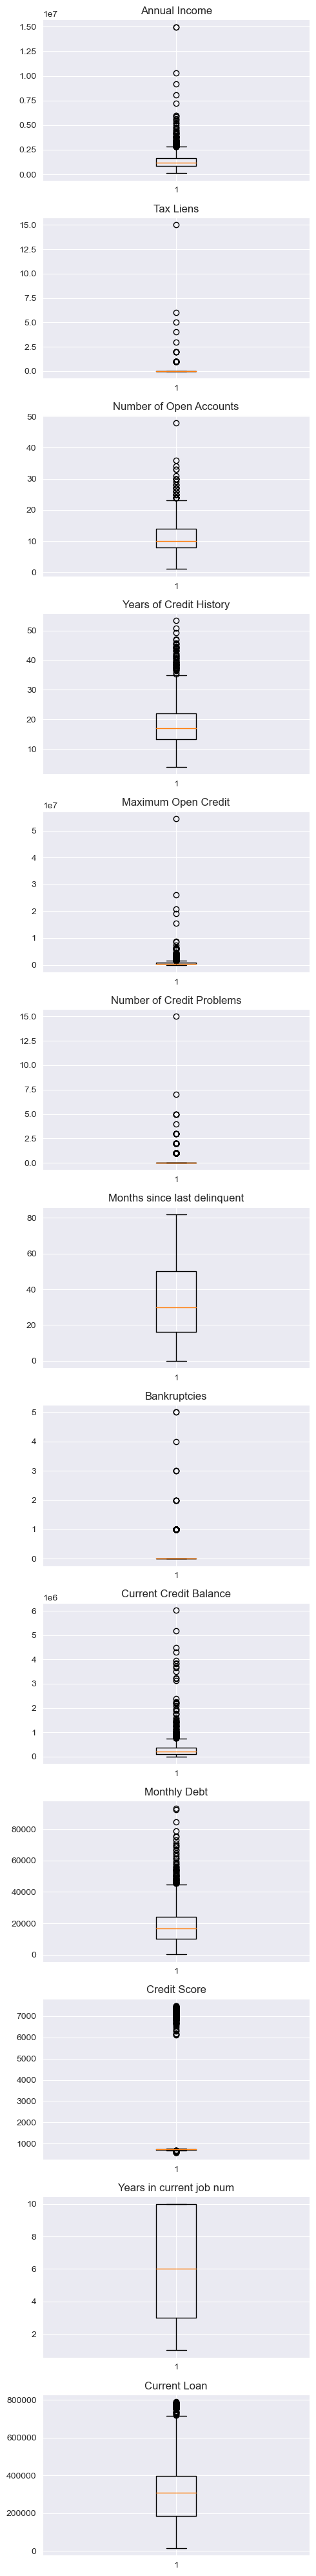

In [623]:
# Some more feel for the data using Boxplots

fig, ax = plt.subplots(len(numeric_feat),1, figsize=(5,40))

for i in range(len(numeric_feat)):
    ax[i].boxplot(cred_test[numeric_feat[i]].dropna())
    ax[i].set_title(numeric_feat[i])
    
plt.tight_layout()

In [625]:
# Deal with current job years missing values

cred_test['Years in current job num'].fillna(np.median(cred_test['Years in current job num'].dropna()), inplace=True)

In [626]:
cred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2500 non-null   int64  
 1   Home Ownership                2500 non-null   object 
 2   Annual Income                 1987 non-null   float64
 3   Years in current job          2414 non-null   object 
 4   Tax Liens                     2500 non-null   float64
 5   Number of Open Accounts       2500 non-null   float64
 6   Years of Credit History       2500 non-null   float64
 7   Maximum Open Credit           2500 non-null   float64
 8   Number of Credit Problems     2500 non-null   float64
 9   Months since last delinquent  1142 non-null   float64
 10  Bankruptcies                  2497 non-null   float64
 11  Purpose                       2500 non-null   object 
 12  Term                          2500 non-null   object 
 13  Cur

In [628]:
# Deal with Bankrupcies null

cred_test['Bankruptcies'].fillna(0, inplace = True)

In [631]:
# Deal with credit score missing values 
del fill_na_credit_score_test

In [648]:
cred_test

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0     7500           Rent            NaN              4 years        0.0   
1     7501           Rent       231838.0               1 year        0.0   
2     7502  Home Mortgage      1152540.0              3 years        0.0   
3     7503  Home Mortgage      1220313.0            10+ years        0.0   
4     7504  Home Mortgage      2340952.0              6 years        0.0   
...    ...            ...            ...                  ...        ...   
2495  9995  Home Mortgage      1020053.0            10+ years        0.0   
2496  9996  Home Mortgage            NaN              2 years        0.0   
2497  9997  Home Mortgage      1171806.0              2 years        0.0   
2498  9998           Rent       723520.0            10+ years        0.0   
2499  9999           Rent      1694439.0            10+ years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                         9.0                     12.5             220968.0   
1                         6.0                     32.7              55946.0   
2                        10.0                     13.7             204600.0   
3                        16.0                     17.0             456302.0   
4                        11.0                     23.6            1207272.0   
...                       ...                      ...                  ...   
2495                     14.0                     29.1             559152.0   
2496                     15.0                     17.0            1737780.0   
2497                     48.0                     12.8            1706430.0   
2498                     14.0                     28.8             945780.0   
2499                     12.0                     18.4            1199748.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           0.0                          70.0           0.0   
1                           0.0                           8.0           0.0   
2                           0.0                           NaN           0.0   
3                           0.0                          70.0           0.0   
4                           0.0                           NaN           0.0   
...                         ...                           ...           ...   
2495                        1.0                          68.0           1.0   
2496                        0.0                          77.0           0.0   
2497                        0.0                           NaN           0.0   
2498                        0.0                           NaN           0.0   
2499                        1.0                          72.0           0.0   

                   Purpose        Term  Current Loan Amount  \
0       debt consolidation  Short Term             162470.0   
1     educational expenses  Short Term              78298.0   
2       debt consolidation  Short Term             200178.0   
3       debt consolidation  Short Term             217382.0   
4       debt consolidation   Long Term             777634.0   
...                    ...         ...                  ...   
2495    debt consolidation  Short Term           99999999.0   
2496    debt consolidation  Short Term             468512.0   
2497    debt consolidation  Short Term             430496.0   
2498    debt consolidation  Short Term             257774.0   
2499    debt consolidation   Long Term             763004.0   

      Current Credit Balance  Monthly Debt  Credit Score  \
0                   105906.0        6813.0           NaN   
1                    46037.0        2318.0         699.0   
2                   146490.0       18729.0        7260.0   
3                   213199.0       27559.0         739.0   
4                   425391.0       42605.0         706.0   
...                      ...           ...           ...   
2495                

In [654]:
# To difficult to find relation of Credit Score with any other variable. 
# Perhaps it's related in the interation of a few variables. Assessing that will be too complicated at this point
# So I am going ahead and imputing median of credit score!!

cred_test['Credit Score'].fillna(np.median(cred_test['Credit Score'].dropna()),inplace=True)

In [656]:
cred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2500 non-null   int64  
 1   Home Ownership                2500 non-null   object 
 2   Annual Income                 1987 non-null   float64
 3   Years in current job          2414 non-null   object 
 4   Tax Liens                     2500 non-null   float64
 5   Number of Open Accounts       2500 non-null   float64
 6   Years of Credit History       2500 non-null   float64
 7   Maximum Open Credit           2500 non-null   float64
 8   Number of Credit Problems     2500 non-null   float64
 9   Months since last delinquent  1142 non-null   float64
 10  Bankruptcies                  2500 non-null   float64
 11  Purpose                       2500 non-null   object 
 12  Term                          2500 non-null   object 
 13  Cur

In [658]:
# Get dummies for categorical variables!

cred_test[['HO_Home Mortgage', 'HO_Own Home', 'HO_Rent']] = pd.get_dummies(cred_test['Home Ownership'],drop_first=True,prefix='HO')

In [659]:
cred_test['Term_Short Term'] = pd.get_dummies(cred_test['Term'], drop_first=True)

In [660]:
cred_test

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0     7500           Rent            NaN              4 years        0.0   
1     7501           Rent       231838.0               1 year        0.0   
2     7502  Home Mortgage      1152540.0              3 years        0.0   
3     7503  Home Mortgage      1220313.0            10+ years        0.0   
4     7504  Home Mortgage      2340952.0              6 years        0.0   
...    ...            ...            ...                  ...        ...   
2495  9995  Home Mortgage      1020053.0            10+ years        0.0   
2496  9996  Home Mortgage            NaN              2 years        0.0   
2497  9997  Home Mortgage      1171806.0              2 years        0.0   
2498  9998           Rent       723520.0            10+ years        0.0   
2499  9999           Rent      1694439.0            10+ years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                         9.0                     12.5             220968.0   
1                         6.0                     32.7              55946.0   
2                        10.0                     13.7             204600.0   
3                        16.0                     17.0             456302.0   
4                        11.0                     23.6            1207272.0   
...                       ...                      ...                  ...   
2495                     14.0                     29.1             559152.0   
2496                     15.0                     17.0            1737780.0   
2497                     48.0                     12.8            1706430.0   
2498                     14.0                     28.8             945780.0   
2499                     12.0                     18.4            1199748.0   

      Number of Credit Problems  Months since last delinquent  ...  \
0                           0.0                          70.0  ...   
1                           0.0                           8.0  ...   
2                           0.0                           NaN  ...   
3                           0.0                          70.0  ...   
4                           0.0                           NaN  ...   
...                         ...                           ...  ...   
2495                        1.0                          68.0  ...   
2496                        0.0                          77.0  ...   
2497                        0.0                           NaN  ...   
2498                        0.0                           NaN  ...   
2499                        1.0                          72.0  ...   

      Current Credit Balance Monthly Debt Credit Score  Annual Income filled  \
0                   105906.0       6813.0        731.0          1.186333e+06   
1                    46037.0       2318.0        699.0          2.318380e+05   
2                   146490.0      18729.0       7260.0          1.152540e+06   
3                   213199.0      27559.0        739.0          1.220313e+06   
4                   425391.0      42605.0        706.0          2.340952e+06   
...                      ...          ...          ...                   ...   
2495                162735.0      15046.0        745.0          1.020053e+06   
2496               1439269.0      32996.0        731.0          1.560959e+06   
2497                676438.0      36912.0        695.0          1.171806e+06   
2498                391248.0      13506.0        744.0          7.235200e+05   
2499                559531.0      23440.0       6820.0          1.694439e+06   

      Years in current job num  Current Loan  HO_Home Mortgage  HO_Own Home  \
0                          4.0      162470.0                 0            0   
1                          1.0       78298.0                 0            0   
2                          3.0      200178.0                 1            0   
3                         10

In [665]:
# Narrow down to relevant columns!

X_test = cred_test.drop(['Id', 'Home Ownership', 'Annual Income','Years in current job', 'Months since last delinquent', 'Purpose', 'Term','Current Loan Amount'],axis=1)

In [666]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tax Liens                  2500 non-null   float64
 1   Number of Open Accounts    2500 non-null   float64
 2   Years of Credit History    2500 non-null   float64
 3   Maximum Open Credit        2500 non-null   float64
 4   Number of Credit Problems  2500 non-null   float64
 5   Bankruptcies               2500 non-null   float64
 6   Current Credit Balance     2500 non-null   float64
 7   Monthly Debt               2500 non-null   float64
 8   Credit Score               2500 non-null   float64
 9   Annual Income filled       2500 non-null   float64
 10  Years in current job num   2500 non-null   float64
 11  Current Loan               2500 non-null   float64
 12  HO_Home Mortgage           2500 non-null   uint8  
 13  HO_Own Home                2500 non-null   uint8

In [667]:
X_test.shape

(2500, 16)

In [668]:
# Feature scaling

X_norm_test, mu_test, sigma_test = zscore_normalise(X_test)

In [673]:
X_norm_test.head()

Tax Liens  Number of Open Accounts  Years of Credit History  \
0  -0.091141                -0.450224                -0.803220   
1  -0.091141                -1.068551                 1.981755   
2  -0.091141                -0.244115                -0.637776   
3  -0.091141                 0.992538                -0.182805   
4  -0.091141                -0.038006                 0.727138   

   Maximum Open Credit  Number of Credit Problems  Bankruptcies  \
0            -0.323879                  -0.289398     -0.299225   
1            -0.433044                  -0.289398     -0.299225   
2            -0.334707                  -0.289398     -0.299225   
3            -0.168202                  -0.289398     -0.299225   
4             0.328576                  -0.289398     -0.299225   

   Current Credit Balance  Monthly Debt  Credit Score  Annual Income filled  \
0               -0.503642     -0.992788     -0.255828             -0.219030   
1               -0.661931     -1.382250     -0.276284             -1.380224   
2               -0.396341      0.039653      3.917884             -0.260142   
3               -0.219968      0.804714     -0.250714             -0.177692   
4                0.341051      2.108349     -0.271809              1.185623   

   Years in current job num  Current Loan  HO_Home Mortgage  HO_Own Home  \
0                 -0.590866     -0.875100         -0.980196     -0.33185   
1                 -1.462178     -1.366071         -0.980196     -0.33185   
2                 -0.881303     -0.655151          1.020204     -0.33185   
3                  1.151759     -0.554801          1.020204     -0.33185   
4                 -0.009991      2.713121          1.020204     -0.33185   

    HO_Rent  Term_Short Term  
0  1.204566         0.585973  
1  1.204566         0.585973  
2 -0.830174         0.585973  
3 -0.830174         0.585973  
4 -0.830174        -1.706565

### I need to rearrange the order of the columns based on the arrangement of columns in the test data - X_norm

In [683]:
X_norm_test.rename(columns={'Credit Score':'Credit Score filled'},inplace=True)

In [687]:
X_norm_test = X_norm_test[X_norm.columns]

# Now!! Let's predict!!

In [689]:
pred_prob = 1/ (1 + np.exp(-(np.dot(X_norm_test,w_norm) + b_norm)))

In [691]:
predict_test = predictions(pred_prob)

In [707]:
predict_test[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [698]:
pd.Series(predict_test,name='Credit Default').value_counts()

0    2303
1     197
Name: y predictions, dtype: int64

In [713]:
submission = pd.concat([cred_test,pd.Series(predict_test,name='Credit Default')],axis=1)[['Id','Credit Default']]

In [714]:
submission

Id  Credit Default
0     7500               0
1     7501               0
2     7502               1
3     7503               0
4     7504               0
...    ...             ...
2495  9995               0
2496  9996               0
2497  9997               0
2498  9998               0
2499  9999               1

[2500 rows x 2 columns]

In [715]:
submission.to_csv('Credit Default Predictions.csv',index=False)

In [716]:
pd.read_csv('Credit Default Predictions.csv')

Id  Credit Default
0     7500               0
1     7501               0
2     7502               1
3     7503               0
4     7504               0
...    ...             ...
2495  9995               0
2496  9996               0
2497  9997               0
2498  9998               0
2499  9999               1

[2500 rows x 2 columns]

# Results!

After submitting the results on Kaggle, I got the score of Score: 0.36900

Not a very impressive score! My leaderboard position was also not very impressive - 143 out of 153 people. 

But it was just my first entry. People have made on average 10 entries. They must have changed the parameters, done some feature engineering, hypertuned the models a bit, perhaps used regularisation as well. 

I may, in future, decide to go more in depth to fine tune my own model and submit more entries!!

Especially feature engineering.
I felt that personally I was not in tune with the data. I was not wondering why I got certain findings from the data. I also didn't think too much about what all features must be interacting with each other! These are areas to improve in future!!

# End! 
But as of now, I am pretty satisfied with the approach I have taken. It took me a lot of hours but it was worth the effort to get connected with the data!! 

GREAT JOB!!